## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target


### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
# define plotting function
import seaborn as sb 
def myplotGrid(X,y):
    """
    This function the pairplot function of seaborn library to create a grid of the Wine dataset
    
    Parameters
    -----------------
    X: Training data
    y: Labels
    
    Outputs
    -----------------
    A grid of the dataset
    """
    df = pd.DataFrame(X, columns=selected_features)
    df['class']=y
    sb.pairplot(df,hue="class")

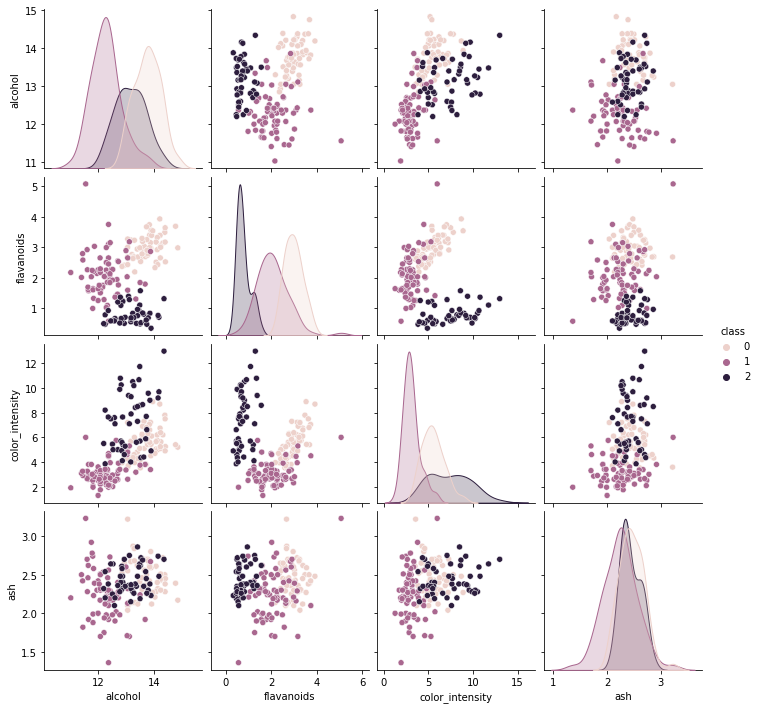

In [3]:
# run the plotting function
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

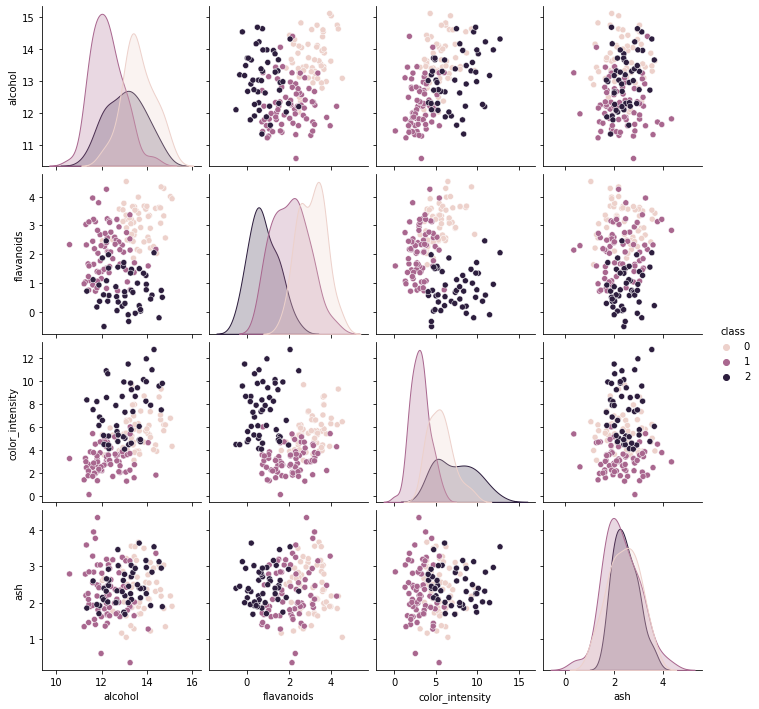

In [4]:
# noise code
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.6,X.shape)
myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer: Alcohol and flavanoids because their classes clusters are the ones which are seperate from each other.

    


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer: Data with Gaussian noise is more widely spread out compared to data without the noise.




## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [5]:
# helper code
import math
from scipy.stats import mode
#This function 
def eucledian(row1, row2):
    """
    This function returns the euclidean distance
    
    Parameters
    -----------------
    row1: First pair of values
    row2: second pair of values
    
    Outputs
    -----------------
    Euclidean distance an integer
    """
    distance = 0
    for i in range(len(row1)-1):
        #Loop through the rows and get their diference and square it and add to distance variable 
        distance += pow((row1[i] - row2[i]), 2)
    #Return the square root of the distance variable
    return math.sqrt(distance)
def manhattan(a, b):
    """
    This function returns the manhattan distance
    
    Parameters
    -----------------
    a: First pair of values
    b: second pair of values
    
    Outputs
    -----------------
    Manhattan distance an integer
    """    
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))


In [6]:
# mykNN code
#Function to calculate KNN
def mykNN(X, y , X_, k,distance_metric):
    """
    This function is my implementation of K nearest neighbors 
    
    Parameters
    -----------------
    X: training data  
    y: training outputs
    X_: testing data
    distance_metric: which distance formula to be used manhattan or euclidean
    
    Outputs
    -----------------
    List of classes predicted of the test set
    """    
    op_labels = []     
    #Loop through the Datapoints to be classified
    for item in X_:          
        #Array to store distances
        point_dist = []         
        #Loop through each training Data
        for j in range(len(X)):
            if(distance_metric=='euclidean'):
                distances = eucledian(X[j] , item)
            else:
                distances = manhattan(X[j] , item)                
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
        l=np.array(y)
        #Labels of the K datapoints from above
        labels = l[dist]
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels


## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [7]:
# confusion matrix, accuracy, precision, recall, etc. 
from collections import defaultdict
def nested_dict(n, type):
    """
    This function returns a nested dictionary of required type 
    
    Parameters
    -----------------
    n: nesting value  
    type: type of dictionary 
    
    Outputs
    -----------------
    Dictionary
    """    
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
def getAccuracy(testingSet,answer):
    """
    This function returns the accuracy of your KNN 
    
    Parameters
    -----------------
    testing set: classes predicted by your KNN  
    answer: Actual classes
    
    Outputs
    -----------------
    Accuracy
    """    
    count = 0
    #Loop through the test set and compare its values with actual values and if they match add the counter
    for i in range(len(testingSet)):
        if answer[i] == testingSet[i]:
            count+=1
    #Accuracy= correctly predicted/total
    return ((count/len(testingSet)))
def getConfusionMatrix(answer,testingSet,size,matrix):
    """
    This function returns the confusion matrix 
    
    Parameters
    -----------------
    answer: Actual classes
    testing set: classes predicted by your KNN  
    size: row size of matrix
    matrix: Containing values of the classes

    Outputs
    -----------------
    A matrix
    """    
    dic = nested_dict(2, float)
    #Intialize the dictionary according to required dimensions
    for i in matrix:
        for j in matrix:
            dic[i][j] = 0
    #This 2d loop fills the dictionary with the required values of the confusion matrix        
    for i in matrix:
        for k in range(len(testingSet)):
                for j in matrix:
                    if(testingSet[k] == i and answer[k] == j):
                        dic[i][j]+=1
    
    array = np.arange(size*size).reshape(size,size)
    m = 0
    #This 2d loops fill a matrix that is to be returned by using the dictionary 
    for i in matrix:
        n = 0
        for j in matrix:
            array[m][n] = dic[i][j]
            n+=1
        m+=1
    return_array=[[0,0,0],[0,0,0],[0,0,0]]
    for i in range(0,len(array)):
         for j in range(0,len(array[i])):
                return_array[i][j]=array[i][j]
    return np.array(return_array)
def precision(row, confMatrix):
    """
    This function calculates the precision of every row 
    
    Parameters
    -----------------
    row: row number
    confMatrix: confusion matrix  

    Outputs
    -----------------
    precision value
    """    
    col = confMatrix[:, row]
    return confMatrix[row, row] / col.sum()
    
def recall(col, confMatrix):
    """
    This function calculates the recall of every column 
    
    Parameters
    -----------------
    col: column number
    confMatrix: confusion matrix  

    Outputs
    -----------------
    recall value
    """    
    row = confMatrix[col, :]
    return confMatrix[col, col] / row.sum()

def getPrecision(confMatrix):
    """
    This function calculates the precion of matrix 
    
    Parameters
    -----------------
    confMatrix: confusion matrix  

    Outputs
    -----------------
    precision value
    """    
    i, j = confMatrix.shape
    sum = 0
    for row in range(i):
        sum += precision(row, confMatrix)
    return sum / i

def getRecall(confMatrix):
    """
    This function calculates the recall of matrix 
    
    Parameters
    -----------------
    confMatrix: confusion matrix  

    Outputs
    -----------------
    recall value
    """    
    i, j = confMatrix.shape
    sum = 0
    for column in range(j):
        sum += recall(column, confMatrix)
    return sum / j



In [8]:
# test evaluation code
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#using the KNN of the sklearn library
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
sckit_y_ = knn.predict(X_test)

#Getting results from my implemented KNN
y_=mykNN(X_train, y_train, X_test, 3,'euclidean')

#Displaying accuracy of both KNN
print("Accuracy of my implemented function",getAccuracy(y_,y_test))
print("Accuracy of sklearn library KNN function:",metrics.accuracy_score(y_test, sckit_y_))

x = np.array(y_)
matrix = np.unique(x)

#Displaying results of other metrics
confMatrix = getConfusionMatrix(y_,y_test,len(matrix),matrix)
print("My Confusion Matrix results")
print("    0   1    2")
count1=0
for j in confMatrix:
    print(count1,end=" : ")
    for i in j:
        print(i,end="   ")
    print('')
    count1+=1
print("Precision score:",getPrecision(confMatrix))
print("Recall Score",getRecall(confMatrix))

Accuracy of my implemented function 0.9259259259259259
Accuracy of sklearn library KNN function: 0.9259259259259259
My Confusion Matrix results
    0   1    2
0 : 13   0   0   
1 : 3   19   0   
2 : 0   1   18   
Precision score: 0.9208333333333334
Recall Score 0.9370015948963317



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [9]:
# myNestedCrossVal code
def getsets(X,y,fold_num,folds):
    """
    This function creates the training and testing set accroding to the fold num provided 
    
    Parameters
    -----------------
    X: Data matrix  
    y: Labels of the data
    fold_num: fold number
    folds: total folds
    
    Outputs
    -----------------
    training and testing sets
    """        
    #Percent 1 and 2 are values that tells from which percent to which is the test set is to be taken from 
    #if fold number is 1 then first 20 percent of the dataset will be the testing set
    percent1=fold_num/folds
    percent2=(fold_num+1)/folds
    val1=int(len(X)*percent1)
    val2=int(len(X)*percent2)
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    #This loop fills the testing and training set
    for i in range(0,len(X)):
        if(i>=val1 and i<val2):
            X_test.append(X[i])
            y_test.append(y[i])
        else:
            X_train.append(X[i])
            y_train.append(y[i])
    return X_train, X_test, y_train, y_test

def myNestedCrossVal(X,y,folds,neighbor_list,distance_metrics,mySeed):
    """
    This function performs nested cross validation and returns the accurcies and confusion matrix of different folds 
    
    Parameters
    -----------------
    X: Dataset  
    y: Label
    folds: total folds
    neigbor_list: list of neigbors from 1 to 10
    distance_metric:  list of distance metric
    mySeed: a random seed to enable us to replicate your results.
    
    Outputs
    -----------------
    accurcies and confusion matrix of different folds in a dictionary   
    """    
    fold_results={}
    #This loop loops through the distance metrics to be used in knn
    for metric in distance_metrics:
        fold_results[metric]={}
        #This loop changes the neighbor values
        for neighbor in neighbor_list:
            fold_results[metric][neighbor]={}
            #This loop changes the fold values and gets different testing and training sets 
            for fold in range(0,folds):
                X_train,X_test, y_train, y_test=getsets(X,y,fold,folds)
                y_=mykNN(X_train, y_train, X_test,neighbor,metric)
                x = np.array(y_)
                matrix = np.unique(x)
                confMatrix = getConfusionMatrix(y_,y_test,len(matrix),matrix)
                #Fills the reults of accuracies and confusion matrix on different parameters
                fold_results[metric][neighbor][fold+1]=(getAccuracy(y_,y_test),confMatrix)
    return fold_results

In [10]:
# evaluate clean data code
results=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],1111)
#displays the results of clean data
# for i in results:
#     print("##############################")
#     print("Distance used ",i)
#     for j in results[i]:
#         print("-------------------------------")
#         print("Value of k is ",j)
#         for k in results[i][j]:
#             print("Fold=",k," accurracy=",results[i][j][k][0])
        

In [11]:
# evaluate noisy  data code
results2=myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan'],1111)
#displays the results of noisy data
# for i in results2:
#     print("##############################")
#     print("Distance used ",i)
#     for j in results2[i]:
#         print("-------------------------------")
#         print("Value of k is ",j)
#         for k in results2[i][j]:
#             print("Fold=",k," accurracy=",results2[i][j][k][0])


In [12]:
# Print the summaries
#Best accuracies and their parameters
print("Clean Data")
best_results_clean={}
for i in range(1,6):
    best_results_clean[i]=[0]
    for j in results:
        for k in results[j]:
            if(results[j][k][i][0]>best_results_clean[i][0]):
                best_results_clean[i]=[results[j][k][i][0],j,k]
for i in best_results_clean:
    print("Fold=",i," Accuracy=",best_results_clean[i][0]," Distance=",best_results_clean[i][1]," Value of K=",best_results_clean[i][2])

print("Noisy Data")
best_results_noisy={}
for i in range(1,6):
    best_results_noisy[i]=[0]
    for j in results2:
        for k in results2[j]:
            if(results2[j][k][i][0]>best_results_noisy[i][0]):
                best_results_noisy[i]=[results2[j][k][i][0],j,k]
for i in best_results_noisy:
    print("Fold=",i," Accuracy=",best_results_noisy[i][0]," Distance=",best_results_noisy[i][1]," Value of K=",best_results_noisy[i][2])

Clean Data
Fold= 1  Accuracy= 1.0  Distance= euclidean  Value of K= 2
Fold= 2  Accuracy= 0.9166666666666666  Distance= euclidean  Value of K= 1
Fold= 3  Accuracy= 0.8857142857142857  Distance= manhattan  Value of K= 1
Fold= 4  Accuracy= 0.9166666666666666  Distance= euclidean  Value of K= 3
Fold= 5  Accuracy= 0.7777777777777778  Distance= euclidean  Value of K= 1
Noisy Data
Fold= 1  Accuracy= 0.9714285714285714  Distance= euclidean  Value of K= 2
Fold= 2  Accuracy= 0.8611111111111112  Distance= euclidean  Value of K= 4
Fold= 3  Accuracy= 0.8571428571428571  Distance= euclidean  Value of K= 7
Fold= 4  Accuracy= 0.8055555555555556  Distance= euclidean  Value of K= 1
Fold= 5  Accuracy= 0.6111111111111112  Distance= manhattan  Value of K= 3


## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 1  |  2 | Euclidean  |
| 2 | 0.916  |  1 | Manhattan  |
| 3 | 0.88  |  1 | Euclidean  |
| 4 | 0.916  |  3 | Euclidean  |
| 5 | 0.77  |  1 | Euclidean  |
| **total** | 0.89 $\pm$ 0.07 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.97  |  2 | Euclidean  |
| 2 | 0.86  |  4 | Euclidean  |
| 3 | 0.85  |  7 | Euclidean  |
| 4 | 0.80  |  1 | Euclidean  |
| 5 | 0.61  |  3 | Manhattan  |
| **total** | 0.818 $\pm$ 0.11 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [13]:
print('CLEAN')
# clean data summary results
for i in best_results_clean:
    print("Confusion matrix for fold ",i)
    print(results[best_results_clean[i][1]][best_results_clean[i][2]][i][1])

print('NOISY')
# Noisy data summary results
for i in best_results_clean:
    print("Confusion matrix for fold ",i)
    print(results2[best_results_clean[i][1]][best_results_clean[i][2]][i][1])


CLEAN
Confusion matrix for fold  1
[[35  0  0]
 [ 0  0  0]
 [ 0  0  0]]
Confusion matrix for fold  2
[[24  0  0]
 [ 2  9  1]
 [ 0  0  0]]
Confusion matrix for fold  3
[[ 0  0  0]
 [ 3 31  1]
 [ 0  0  0]]
Confusion matrix for fold  4
[[ 0  0  0]
 [ 1 23  0]
 [ 0  2 10]]
Confusion matrix for fold  5
[[ 0  0  0]
 [ 8 28  0]
 [ 0  0  0]]
NOISY
Confusion matrix for fold  1
[[34  1  0]
 [ 0  0  0]
 [ 0  0  0]]
Confusion matrix for fold  2
[[20  3  1]
 [ 2  8  2]
 [ 0  0  0]]
Confusion matrix for fold  3
[[ 0  0  0]
 [ 6 28  1]
 [ 0  0  0]]
Confusion matrix for fold  4
[[ 0  0  0]
 [ 1 23  0]
 [ 2  4  6]]
Confusion matrix for fold  5
[[ 0  0  0]
 [ 0  0  0]
 [16  2 18]]


## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer: Yes they do change. And unfortunately no, we cannot say that one parameter choice is better regardless of the data used.



### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer: I will keep on decreasing the value of K by 1 so at some stage there won't be a tie.

Pseudocode:
    if(neighbor1_class==neighbor2_class):
        KNN(train_set,test_data,k-1)


### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer: No consideration needs to be taken into account because my KNN code is generic. You just have to supply it with test and training set of the dataset you want to use and it will work on it without any changes.


# References

For Qn2 Implementing kNN, I have referred to this website: https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch

For Qn4 Nested Cross-validation, I have referred to this website: https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/